# LIBRARY

In [1]:
import neurokit2 as nk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import scipy.io.wavfile
from scipy import signal
from sklearn.preprocessing import MinMaxScaler
import os

# AQUISISI

In [2]:
path_file = os.listdir('data/data_fix/')
label = [filesname.replace('.csv', '') for filesname in path_file]

# label
file = {}
for no_label in label:
    data = pd.read_csv(f'data/data_fix/{no_label}.csv')
    file[no_label] = data
    globals()[no_label] = data

# WINDOWING/SEGMENTASI

In [4]:
window_size = 2000
window_step = 2000


file_segmen = []
for no_segmen in range(0,len(label)):
    file[label[no_segmen]].columns = ["num","ir","waktu"]
    path1 = file[label[no_segmen]][(file[label[no_segmen]].waktu >10)]
    path1 = path1[(path1.waktu <=190)]
    
    for no_window in range(0,len(path1),window_step):
        window = path1[no_window:no_window+window_size]
        file_segmen.append(window)

<Axes: >

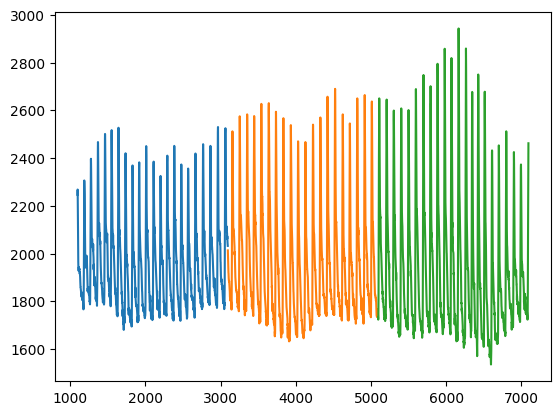

In [19]:
a = (file_segmen[0])['ir']
b = (file_segmen[1])['ir']
c = (file_segmen[2])['ir']

a.plot()
b.plot()
c.plot()

# NORMALIZE
## VARIANCE BPM & STD BPM

In [20]:
info = []
minmaxx = []
signals = []
data_var = []
data_std = []
for no_minmax in range(0,len(file_segmen)):
    minmax = MinMaxScaler(feature_range=(0,1))
    
    path_minmax1 = minmax.fit_transform(file_segmen[no_minmax])
    path_minmax_seg1 = pd.DataFrame(path_minmax1)[1]

    signals1, info1 = nk.ppg_process(path_minmax_seg1, sampling_rate=100)

    minmaxx.append(path_minmax_seg1)
    signals.append(signals1)
    info.append(info1)

    data_var.append(float(pd.DataFrame(info1['PPG_Peaks']).diff().var()))
    data_std.append(float(pd.DataFrame(info1['PPG_Peaks']).diff().std()))

C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_856\1732030540.py:18: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data_var.append(float(pd.DataFrame(info1['PPG_Peaks']).diff().var()))
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_856\1732030540.py:19: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data_std.append(float(pd.DataFrame(info1['PPG_Peaks']).diff().std()))
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_856\1732030540.py:18: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data_var.append(float(pd.DataFrame(info1['PPG_Peaks']).diff().var()))
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_856\1732030540.py:19: FutureWarning: Calling float on a single element Series is deprecated and will rais

<Axes: >

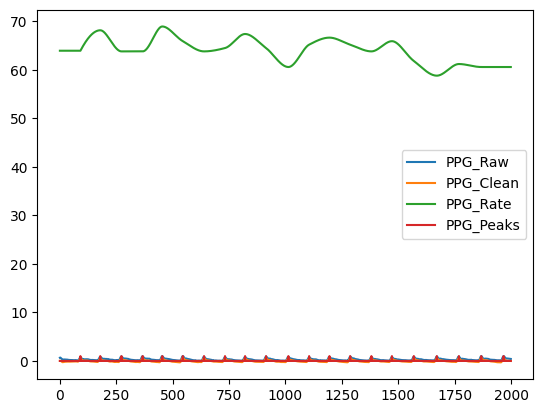

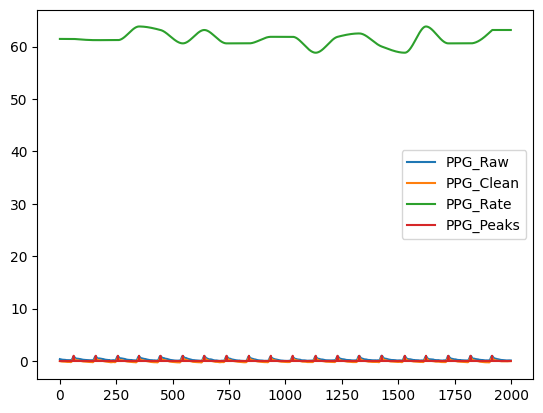

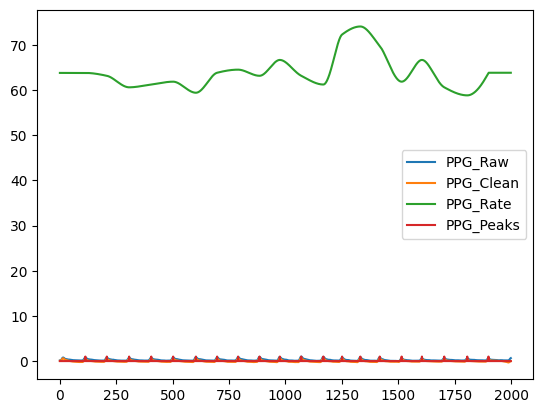

In [29]:
a = (signals[0])
b = (signals[1])
c = (signals[2])

a.plot()
b.plot()
c.plot()

# BPM & HRV

In [31]:
analyze_signals = []
bpm = []
hrv = []
for no_analyze in range(0,len(file_segmen)):
    analyze_signals1 = nk.ppg_analyze(signals[no_analyze], sampling_rate=100)

    analyze_signals.append(analyze_signals1)
    bpm.append(float(analyze_signals1['PPG_Rate_Mean']))
    hrv.append(float(analyze_signals1['HRV_MeanNN']))

C:\Users\MY ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\neurokit2\hrv\hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
C:\Users\MY ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\neurokit2\complexity\entropy_multiscale.py:351: RuntimeWarning: invalid value encountered in scalar divide
  mse = np.trapz(mse) / len(mse)
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_856\1363301538.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  bpm.append(float(analyze_signals1['PPG_Rate_Mean']))
C:\User

In [32]:
bpm[0]

64.03702694943496

In [33]:
ppg_elgendi = []
for no_ppgelgendi in range(0,len(file_segmen)): 
        ppg_elgendi1 = nk.ppg_clean(minmaxx[no_ppgelgendi], sampling_rate=100, method='elgendi')
        ppg_elgendi.append(ppg_elgendi1)

# SISTOL&DIASTOL&DISTANCE

In [62]:
sistol = []
diastol = []
distance = []

for no_sisdis in range(0,len(file_segmen)):  
    path = ppg_elgendi[no_sisdis]
    med = path.max()/4
    sistol1 = []
    for i in range(1, len(path) - 1):
        if path[i] > path[i - 1] and path[i] > path[i + 1] and path[i] > med:
            sistol1.append(i)


    diastol1 = []
    for i in range(1, len(path) - 1):
        if path[i] > path[i - 1] and path[i] > path[i + 1] and path[i] < med:
            diastol1.append(i)

    sistol.append(float(pd.DataFrame(path[sistol1]).mean()))
    diastol.append(float(pd.DataFrame(path[diastol1]).mean()))
    distance.append(float(pd.DataFrame(path[sistol1]).mean())-float(pd.DataFrame(path[diastol1]).mean()))

    # plt.plot(path);
    # plt.plot(diastol1, path[diastol1], "x");
    # plt.plot(sistol1, path[sistol1], "x");

C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_856\3984257895.py:19: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  sistol.append(float(pd.DataFrame(path[sistol1]).mean()))
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_856\3984257895.py:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  diastol.append(float(pd.DataFrame(path[diastol1]).mean()))
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_856\3984257895.py:21: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  distance.append(float(pd.DataFrame(path[sistol1]).mean())-float(pd.DataFrame(path[diastol1]).mean()))


# DATAFRAME

In [ ]:
dataajah = {'BPM':bpm,'HRV':hrv,'VAR':data_var,'STD':data_std,'SISTOL':sistol,'DIASTOL':diastol,'DISTANCE':distance}

In [ ]:
dataaaaa = pd.DataFrame(dataajah)
# dataaaaa.to_excel('DATA_KNN_1500x1500.xlsx')

# LABELING

In [ ]:
bahan_label = pd.read_excel('excel/DATA_KNN_2000x2000.xlsx',sheet_name='Sheet2')
nama = bahan_label['NAMA']
kecemasan = bahan_label['kecemasan']

In [ ]:
# label
named = []
anxd = []
for name,anx in zip(nama,kecemasan):
    named.append(name)
    named.append(name)
    named.append(name)
    named.append(name)
    named.append(name)
    named.append(name)
    named.append(name)
    named.append(name)
    named.append(name)
    named.append(name)

    anxd.append(anx)
    anxd.append(anx)
    anxd.append(anx)
    anxd.append(anx)
    anxd.append(anx)
    anxd.append(anx)
    anxd.append(anx)
    anxd.append(anx)
    anxd.append(anx)
    anxd.append(anx)


# Print the updated data list
cih = pd.DataFrame(named,anxd)
cih

cih.to_excel('cih.xlsx')
